In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Help/Lung Cancer/Lung final.csv')

In [4]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
'''df=df[['GENDER', 'AGE', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]'''

"df=df[['GENDER', 'AGE', 'YELLOW_FINGERS', 'ANXIETY',\n       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',\n       'ALCOHOL CONSUMING', 'COUGHING',\n       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]"

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [7]:
X=df.iloc[:,:15]

In [8]:
df.LUNG_CANCER.value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [9]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [10]:
y=df.iloc[:,15]

In [11]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [12]:
#!pip install keras

In [13]:
import keras

In [14]:
#keras.utils.all_utils.Sequence

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter=Counter(y)
print('Before oversampling',counter)
sm=SMOTE()
x,y = sm.fit_resample(X,y)
counter=Counter(y)
print('After oversampling',counter)

Before oversampling Counter({1: 270, 0: 39})
After oversampling Counter({1: 270, 0: 270})


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape,y_train.shape

((432, 15), (432,))

In [18]:
x_test.shape,y_test.shape

((108, 15), (108,))

### Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr=LogisticRegression()
lr.fit(x_train,y_train)

predlr=lr.predict(x_test)

print(f"Accuracy of support vector  classifier is: {accuracy_score(y_test,predlr )}")

print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

Accuracy of support vector  classifier is: 0.9537037037037037
[[47  4]
 [ 1 56]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.93      0.98      0.96        57

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#SVC

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC()
modelSVC.fit(x_train, y_train)
#print(modelSVC.score(x_test, y_test))

y_pred = modelSVC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6574074074074074
[[43  8]
 [29 28]]
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        51
           1       0.78      0.49      0.60        57

    accuracy                           0.66       108
   macro avg       0.69      0.67      0.65       108
weighted avg       0.69      0.66      0.65       108



### Decision Tree

In [22]:
from sklearn import tree
from sklearn.metrics import accuracy_score

modelDTC = tree.DecisionTreeClassifier()
modelDTC.fit(x_train, y_train)
#print(modelDTC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelDTC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9351851851851852
[[47  4]
 [ 3 54]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.93      0.95      0.94        57

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.94      0.94      0.94       108



### Random Forest

In [ ]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

modelRFC = ensemble.RandomForestClassifier()
modelRFC.fit(x_train, y_train)
#print(modelRFC.score(x_test, y_test))


# Predicting the Test set results
y_pred = modelRFC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9537037037037037
[[47  4]
 [ 1 56]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.93      0.98      0.96        57

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108



### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

modelMNB = MultinomialNB()
modelMNB.fit(x_train, y_train)
#print(modelMNB.score(x_test, y_test))


# Predicting the Test set results
y_pred = modelMNB.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8703703703703703
[[43  8]
 [ 6 51]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        51
           1       0.86      0.89      0.88        57

    accuracy                           0.87       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.87      0.87      0.87       108



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelKNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'minkowski', p = 2)
modelKNN.fit(x_train, y_train)
#print(modelKNN.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9351851851851852
[[49  2]
 [ 5 52]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        51
           1       0.96      0.91      0.94        57

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



### Gradiant Boosting

In [ ]:
modelGBC = ensemble.GradientBoostingClassifier(max_depth = 3)
modelGBC.fit(x_train, y_train)
#print(modelGBC.score(x_test_smt, y_test_smt))


# Predicting the Test set results
y_pred = modelGBC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9537037037037037
[[48  3]
 [ 2 55]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.95      0.96      0.96        57

    accuracy                           0.95       108
   macro avg       0.95      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108



### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

modelABC = AdaBoostClassifier(random_state = 96)
modelABC.fit(x_train, y_train)
#print(modelABC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelABC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9629629629629629
[[48  3]
 [ 1 56]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.95      0.98      0.97        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.96      0.96      0.96       108



### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
# loss = 'hinge'
modelSGDC = SGDClassifier()#loss = 'log', penalty = "l1", max_iter = 10
modelSGDC.fit(x_train, y_train)
#print(modelSGDC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelSGDC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8148148148148148
[[43  8]
 [12 45]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        51
           1       0.85      0.79      0.82        57

    accuracy                           0.81       108
   macro avg       0.82      0.82      0.81       108
weighted avg       0.82      0.81      0.81       108



#### XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg_fit=xg.fit(x_train, y_train)
predxg = xg_fit.predict(x_test)

print(f"Accuracy of support vector  classifier is: {accuracy_score(y_test,predxg )}")

print(confusion_matrix(y_test, predxg))
print(classification_report(y_test, predxg))

Accuracy of support vector  classifier is: 0.9537037037037037
[[47  4]
 [ 1 56]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.93      0.98      0.96        57

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108



### Explainability

#### Shap

In [23]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.0 MB/s 


In [24]:
!pip install shapash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 917 kB 5.2 MB/s 
     |████████████████████████████████| 1.0 MB 50.6 MB/s 
     |████████████████████████████████| 642 kB 61.8 MB/s 
     |████████████████████████████████| 9.9 MB 48.1 MB/s 
     |████████████████████████████████| 216 kB 63.1 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013943 sha256=6ff6f09c3d301a55f902eeb23003ef7370d9dcceed6b7834cbdeae52311edc92
  Stored in directory: /root/.cache/pip/wheels/82/4d/8c/0764de014b25313cf54199f212bad4fb4b228ecfaef58be3b9
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669715 sha256=f2757683c5dfa1c2f7ed30f0f656e29f8afa72d17a1a86de7149d2f35cb1a124
  Stored in directory: /root/.cache/pip/wheels/00/35/e5/57e90f10c529601c6627400513cb65dd5adb09752411f5a050
Successfully built da

In [25]:
#Import shapash module
from shapash.explainer.smart_explainer import SmartExplainer

In [26]:
SE = SmartExplainer(model=modelDTC)
SE.compile(
x=x_test,

)

In [ ]:
#app = SE.run_app(title_story='Customer default_Data')

In [27]:
SE.plot.features_importance()

In [28]:
SE.plot.features_importance(label=0)

In [29]:
SE.plot.features_importance(label=1)

In [ ]:
SE = SmartExplainer(model=modelRFC)
SE.compile(
x=x_test,

)
SE.plot.features_importance()

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 89.8 MB/s 
     |████████████████████████████████| 13.1 MB 60.5 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=38352149bd0d4ca33cd732d7c2d027a51896e40e7254d1da9db64d47d8ad1ffd
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6960a5b8257932093034728cad0c08a60c3735acdd36a772b7128d753698f51a
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into

In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

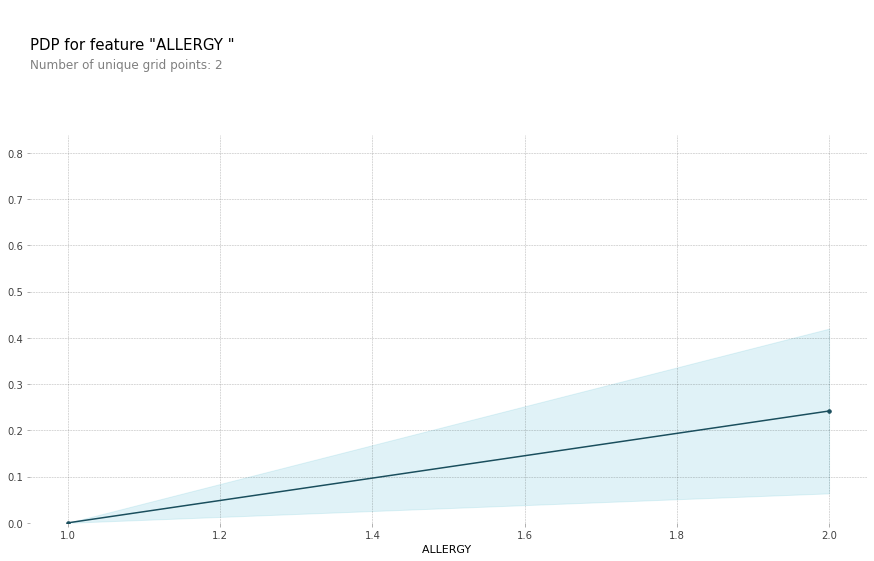

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='ALLERGY ')

pdp.pdp_plot(pdp_goals,'ALLERGY ')
plt.show()

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc36e295910>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc1f1add4d0>})

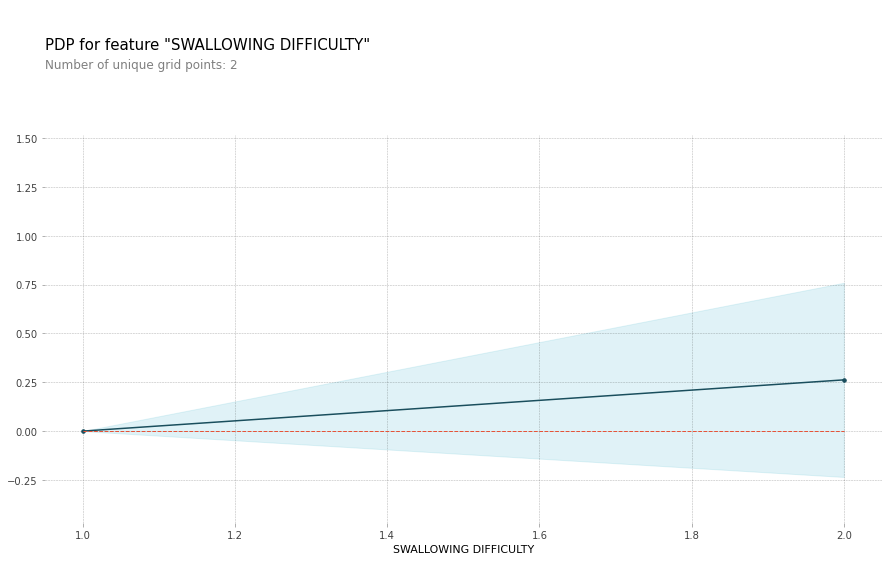

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelDTC,dataset=x_test,model_features=x_test.columns,feature='SWALLOWING DIFFICULTY')

pdp.pdp_plot(pdp_goals,'SWALLOWING DIFFICULTY')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc1f1a3dc10>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc1f1a2d2d0>})

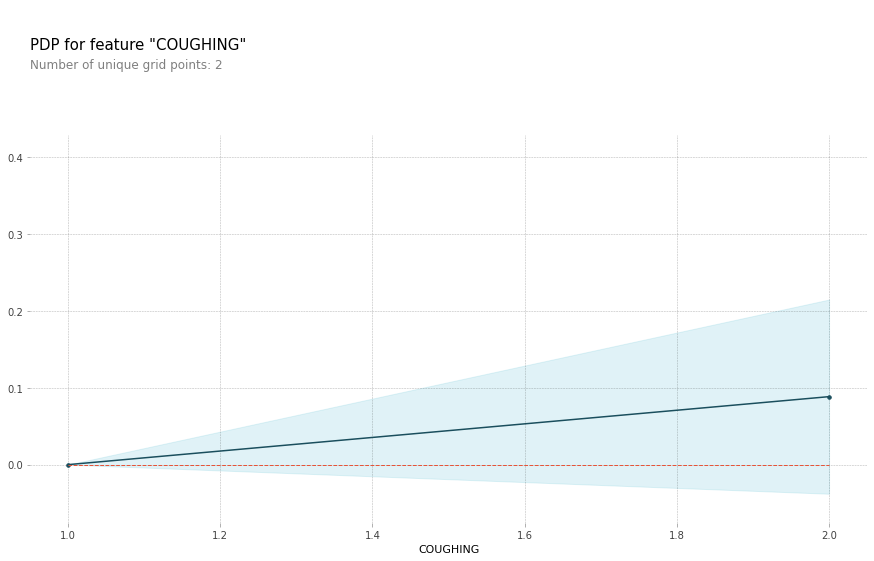

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=xg_fit,dataset=x_test,model_features=x_test.columns,feature='COUGHING')

pdp.pdp_plot(pdp_goals,'COUGHING')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc1f1920250>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc1f1920190>})

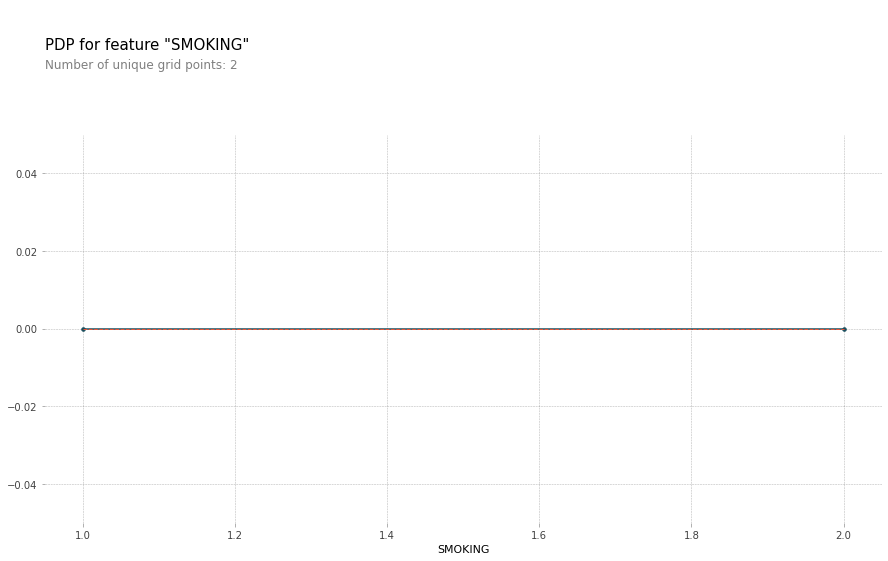

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelDTC,dataset=x_test,model_features=x_test.columns,feature='SMOKING')

pdp.pdp_plot(pdp_goals,'SMOKING')

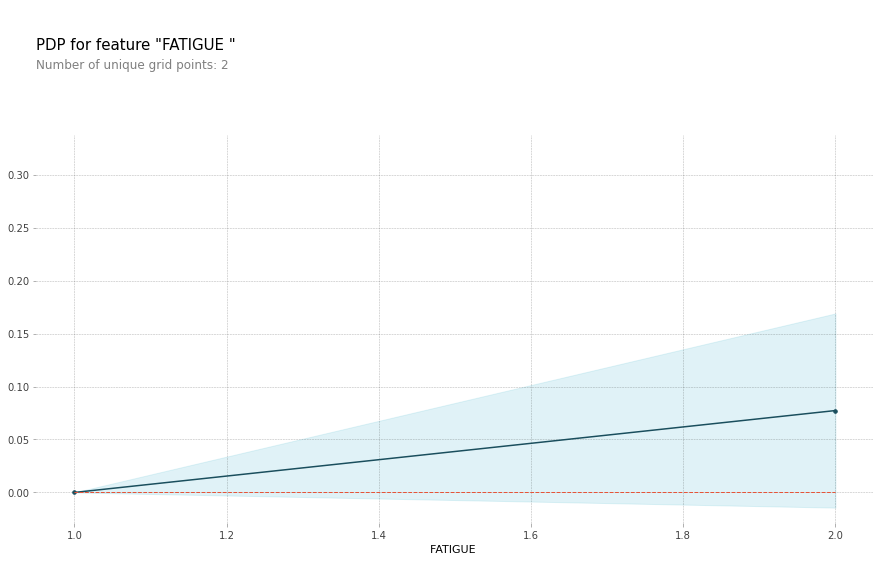

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='FATIGUE ')

pdp.pdp_plot(pdp_goals,'FATIGUE ')
plt.show()

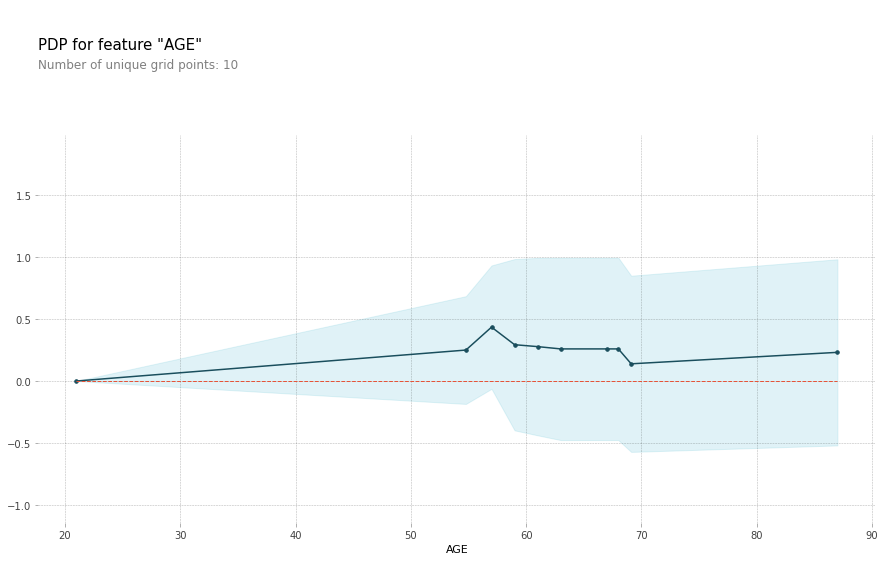

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelDTC,dataset=x_test,model_features=x_test.columns,feature='AGE')

pdp.pdp_plot(pdp_goals,'AGE')
plt.show()

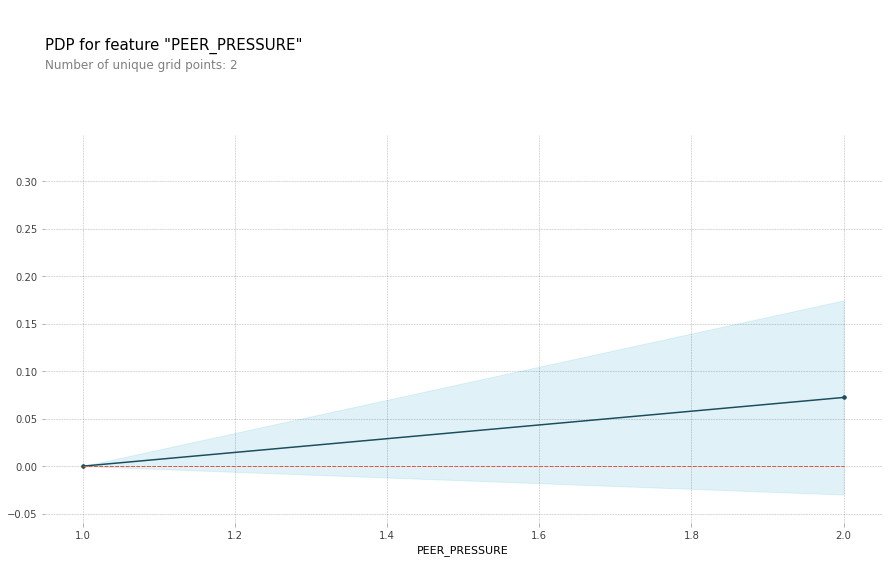

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=xg_fit,dataset=x_test,model_features=x_test.columns,feature='PEER_PRESSURE')

pdp.pdp_plot(pdp_goals,'PEER_PRESSURE')
plt.show()

2D partial dependency plot

In [ ]:
X.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

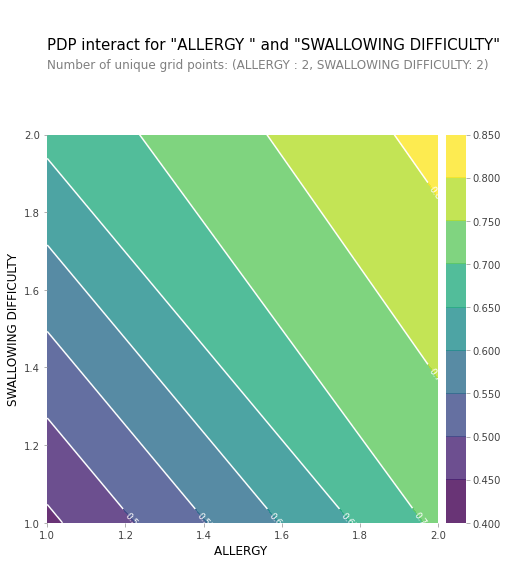

In [ ]:
features_to_plot=['ALLERGY ','SWALLOWING DIFFICULTY']
inter1=pdp.pdp_interact(model=modelRFC,dataset=x_test,model_features=x_test.columns,features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1,feature_names=features_to_plot,plot_type='contour')
plt.show()

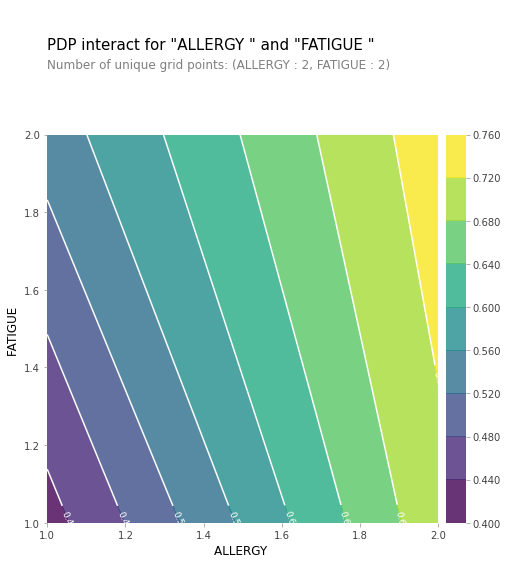

In [ ]:
features_to_plot=['ALLERGY ','FATIGUE ']
inter1=pdp.pdp_interact(model=modelRFC,dataset=x_test,model_features=x_test.columns,features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1,feature_names=features_to_plot,plot_type='contour')
plt.show()

Shap values

In [ ]:
row_to_show=10
data_for_prediction=x_test.iloc[row_to_show]
data_for_prediction_array=data_for_prediction.values.reshape(1,-1)
modelRFC.predict_proba(data_for_prediction_array)

array([[0.06, 0.94]])

In [ ]:
# calculate shap values
import shap
explainer=shap.TreeExplainer(modelRFC)
shap_values=explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1],data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0],data_for_prediction)

Summary plots

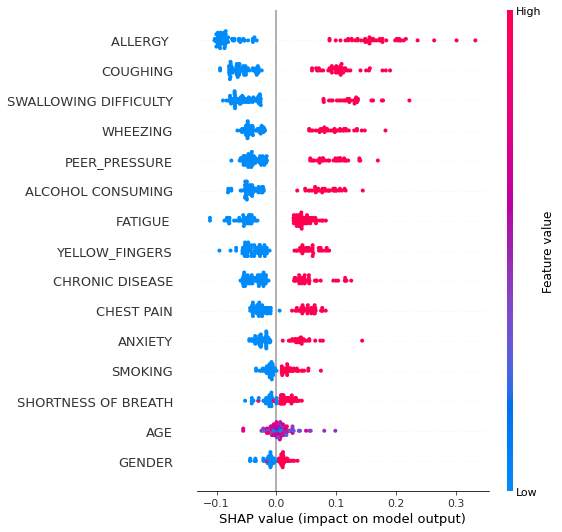

In [ ]:
import shap
explainer=shap.TreeExplainer(modelRFC)
shap_values=explainer.shap_values(x_test)
# Make plot of index 1
shap.summary_plot(shap_values[1],x_test)


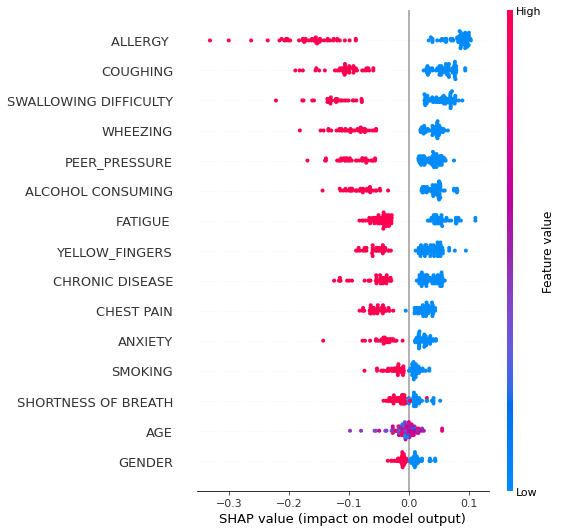

In [ ]:
shap.summary_plot(shap_values[0],x_test)